## import libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import tree

In [ ]:
from sklearn import metrics

## Getting data

In [ ]:
freq_df = pd.read_csv('/content/Frequencies_df.csv')

In [ ]:
freq_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,is_fake
0,-10.0,-10.0,-10.0,-10.0,57250.0,-10.0,-10.0,20980.0,326.8,217.0,...,4.3700,5.120,8.160,4.227,5.207,9.190,17.670,42.160,59.030,1
1,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,42270.0,4880.0,963.5,269.0,...,0.4976,0.639,0.818,1.178,1.162,1.379,2.986,5.250,3.453,1
2,-10.0,-10.0,-10.0,-10.0,-10.0,43000.0,23250.0,1990.0,27.4,13.7,...,5.5430,5.676,4.023,4.560,4.670,5.332,10.055,13.340,8.280,1
3,13510.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,46370.0,4396.0,...,8.9500,7.855,8.080,8.180,4.895,3.453,3.370,8.360,11.266,1
4,-10.0,-10.0,-10.0,-10.0,-10.0,26610.0,18480.0,5416.0,1078.0,209.2,...,31.8800,31.640,29.860,18.380,20.080,27.500,22.280,87.900,136.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,60640.0,47300.0,...,116.2500,138.000,151.200,131.100,151.200,166.400,178.000,816.500,920.000,0
1496,37120.0,-10.0,-10.0,-10.0,-10.0,-10.0,28340.0,28050.0,31710.0,-10.0,...,0.5938,0.705,0.618,2.055,3.637,2.564,2.385,2.586,0.847,0
1497,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,38.0300,44.620,50.160,41.780,27.840,20.970,14.830,28.140,29.500,0
1498,15340.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,64860.0,...,42.4000,37.280,41.500,38.530,69.940,29.970,23.330,25.170,27.840,0


In [ ]:
X = freq_df.drop('is_fake', axis=1)
y = freq_df['is_fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
#clf = DecisionTreeClassifier(random_state=0)
#clf = RandomForestClassifier(max_depth=6, random_state=0)
#clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
#clf = LogisticRegressionCV(cv=5, random_state=0)
#clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_depth=6, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=6, n_estimators=20,
                           random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix

array([[154,   0],
       [  0, 146]])

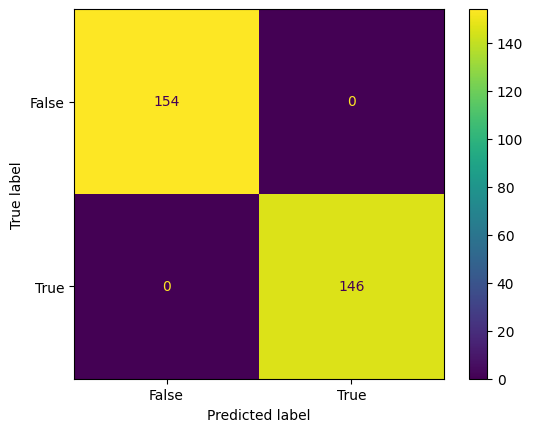

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_14 <= 1634.50
|   |--- feature_11 <= -0.93
|   |   |--- feature_74 <= 5073.00
|   |   |   |--- class: 0
|   |   |--- feature_74 >  5073.00
|   |   |   |--- class: 1
|   |--- feature_11 >  -0.93
|   |   |--- feature_10 <= 13471.00
|   |   |   |--- feature_55 <= 16.47
|   |   |   |   |--- feature_17 <= 1475.75
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_17 >  1475.75
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_55 >  16.47
|   |   |   |   |--- class: 1
|   |   |--- feature_10 >  13471.00
|   |   |   |--- class: 0
|--- feature_14 >  1634.50
|   |--- feature_39 <= 4503.00
|   |   |--- feature_34 <= 1.55
|   |   |   |--- class: 1
|   |   |--- feature_34 >  1.55
|   |   |   |--- feature_31 <= 23645.00
|   |   |   |   |--- feature_45 <= 3140.00
|   |   |   |   |   |--- feature_5 <= 44035.00
|   |   |   |   |   |   |--- feature_100 <= 60.67
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_100 >  60.67
|   |   |   |   |

In [ ]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [ ]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'],
      dtype='object', length=101)

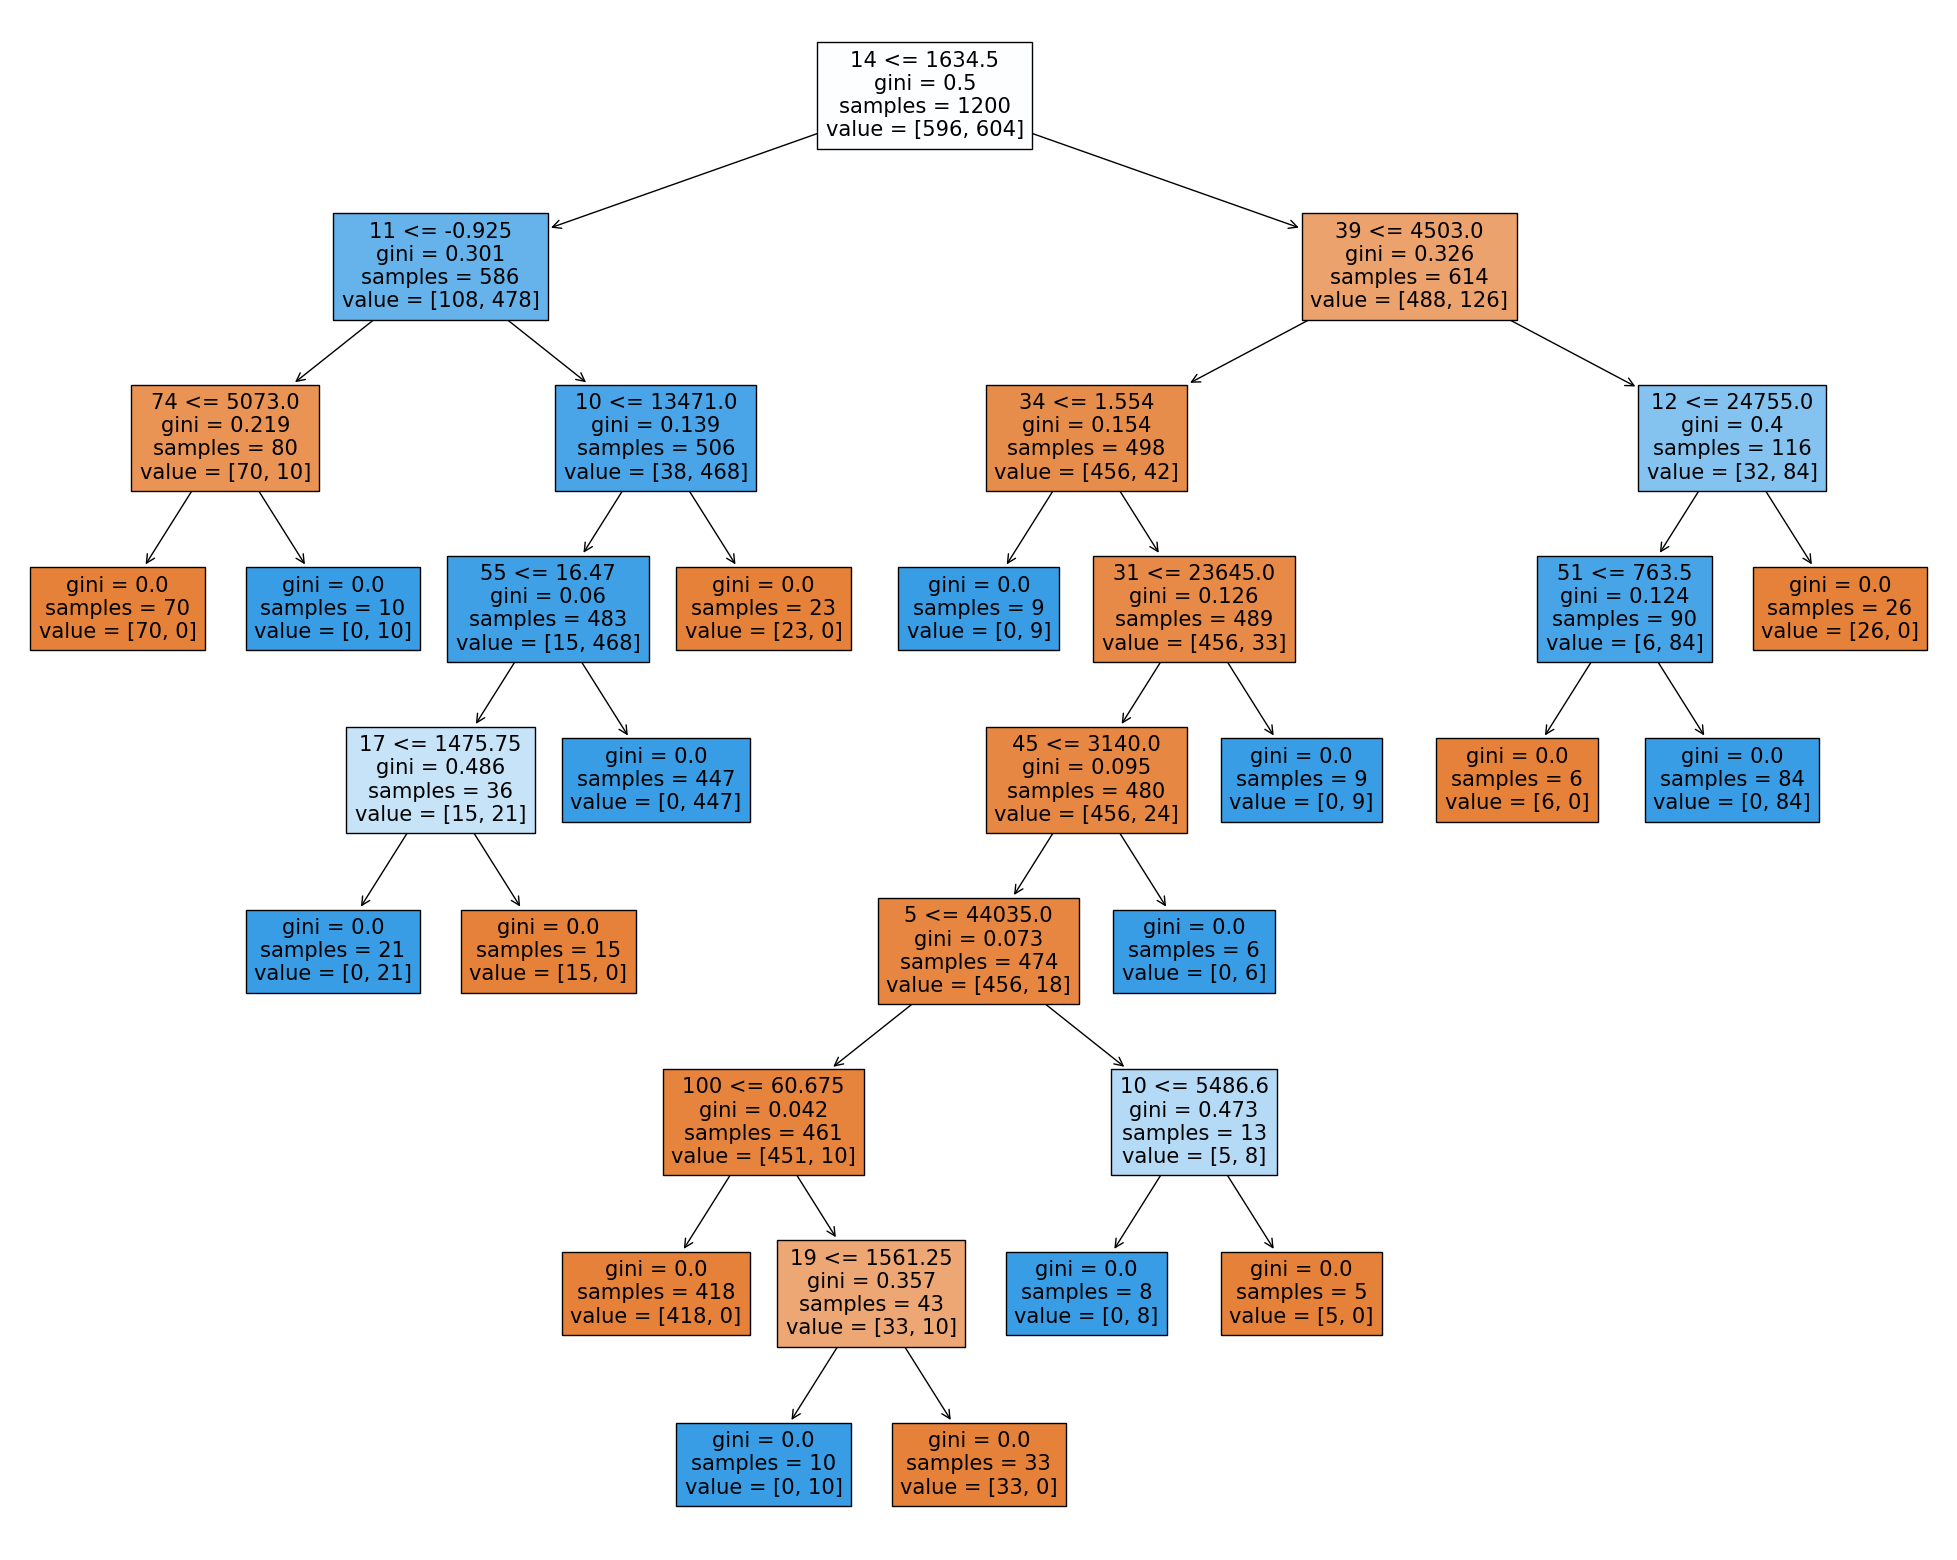

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=list(X.columns), filled=True)

In [ ]:
#from dtreeviz.trees import dtreeviz # remember to load the package
import dtreeviz

viz = dtreeviz.model(clf, X, y,
                target_name="is_fake",
                feature_names=list(X.columns),
                class_names=['fake', 'real'])

viz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


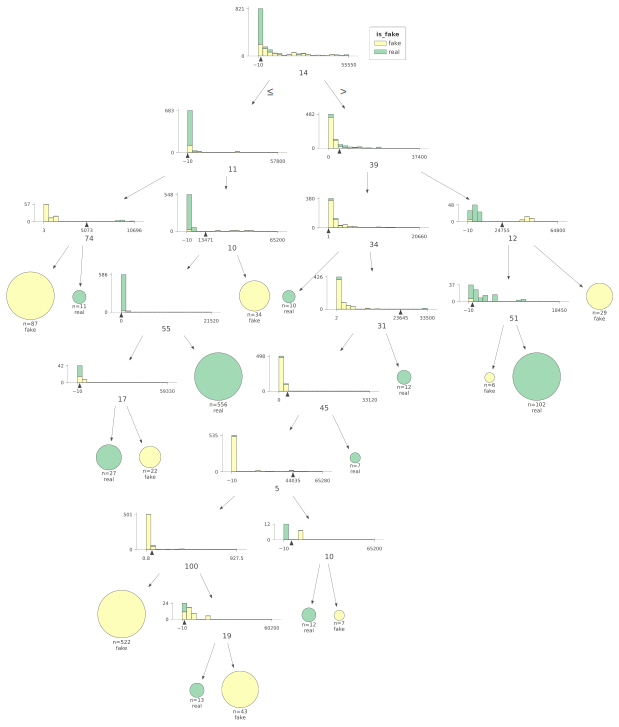

In [ ]:
viz.view(scale=0.8)